# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

# Importing Lirabries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le =  LabelEncoder()


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [2]:

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [3]:
df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

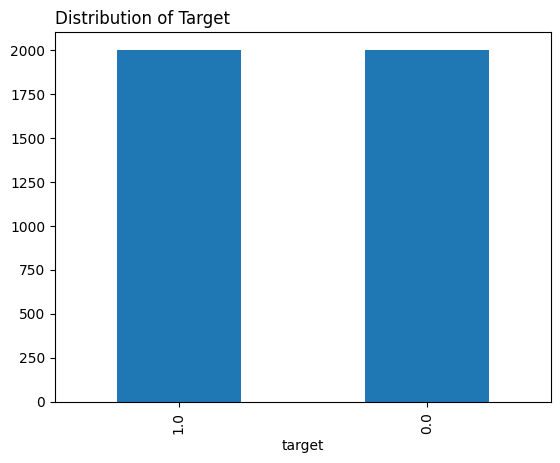

In [5]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [6]:
cols = ['var0', 'var1', 'var2']
df[cols] = df[cols].apply(le.fit_transform)

In [7]:
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [8]:
elbow = []
for i in range(1, 10):
    k = KMeans(n_clusters=i, n_init=8)
    k.fit(X_train)
    elbow.append(k.inertia_)


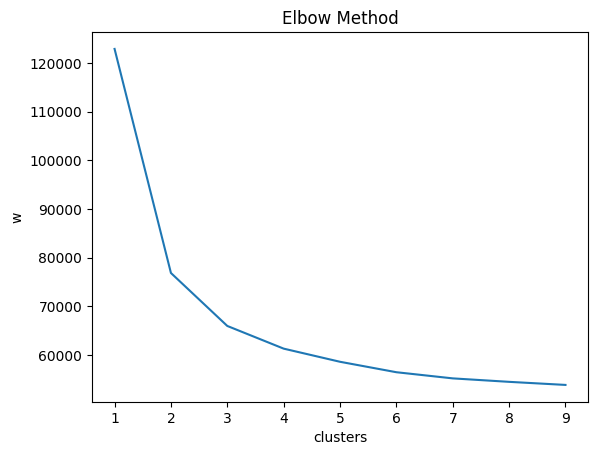

In [9]:
plt.plot(range(1, 10), elbow)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('w')
plt.show()

**By the definition of elbow method, we can choose the number of clusters to be 4**

In [10]:
k = KMeans(n_clusters=4)
k.fit(X_train)
preds = k.predict(X_train)

### Kmeans results (4 clusters)

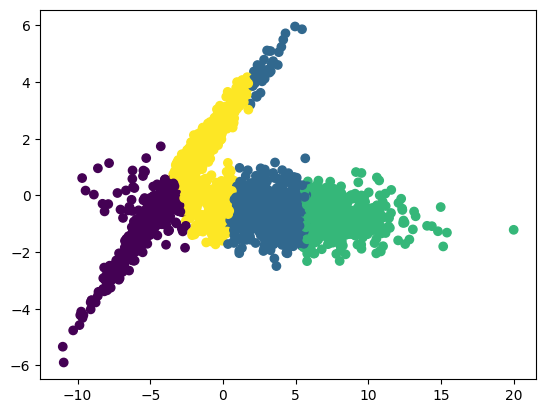

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds)
plt.show()

### True Results

<Axes: >

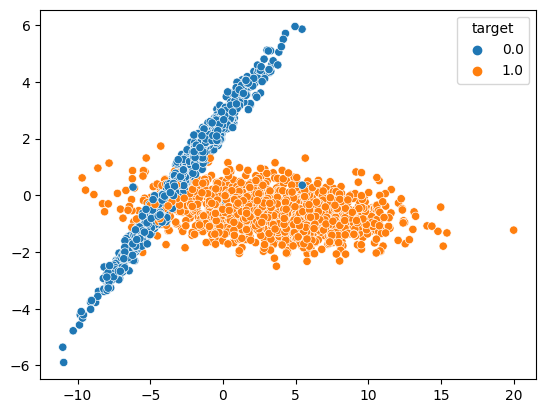

In [12]:
p = PCA(n_components=2)
p_t = p.fit_transform(X_train)

import seaborn as sns
sns.scatterplot(x = p_t[:, 0], y = p_t[:, 1], hue = y_train)

### From the scatterplot of clustring, we can say that model is partially able to differentiate between the classes. 

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [13]:
pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('lr', LogisticRegression())
            ])

In [14]:
_ = pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [15]:
print(f"Accuracy:", accuracy_score(preds, y_test))

print(f"Precision:", precision_score(preds, y_test))

print(f"Recall:", recall_score(preds, y_test))

Accuracy: 0.9275
Precision: 0.8620689655172413
Recall: 0.9943181818181818


## Using Cross Validation

In [16]:
cv = cross_validate(LogisticRegression(), X_train, y_train, scoring=['accuracy', 'recall', 'precision',], cv=10)

In [17]:
cv

{'fit_time': array([0.03278327, 0.01681519, 0.01894975, 0.02375674, 0.01428843,
        0.03124404, 0.03124094, 0.01562214, 0.0156219 , 0.03124261]),
 'score_time': array([0.        , 0.02002025, 0.0026052 , 0.00498605, 0.        ,
        0.        , 0.        , 0.01562095, 0.        , 0.        ]),
 'test_accuracy': array([0.95625 , 0.903125, 0.9375  , 0.940625, 0.953125, 0.946875,
        0.925   , 0.934375, 0.95625 , 0.95    ]),
 'test_recall': array([0.91823899, 0.81132075, 0.87421384, 0.88050314, 0.90566038,
        0.89375   , 0.85      , 0.875     , 0.9125    , 0.90625   ]),
 'test_precision': array([0.99319728, 0.99230769, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9929078 , 1.        , 0.99315068])}

### Using Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

params = [ {'C' : [0.1, 0.001, 1, 10]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=params, scoring='accuracy')
gs = gs.fit(X_train, y_train)

In [19]:
gs

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.001, 1, 10]}], scoring='accuracy')

**Since we have encoded the categorical columns, we can build a model without using ohe hot encoding**

In [20]:
gs.best_params_

{'C': 0.1}

In [21]:
pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression(C = 0.1))
            ])

_ = pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [22]:
print(f"Accuracy:", accuracy_score(preds, y_test))

print(f"Precision:", precision_score(preds, y_test))

print(f"Recall:", recall_score(preds, y_test))

Accuracy: 0.93125
Precision: 0.8694581280788177
Recall: 0.9943661971830986


### Plotting Roc Curve

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

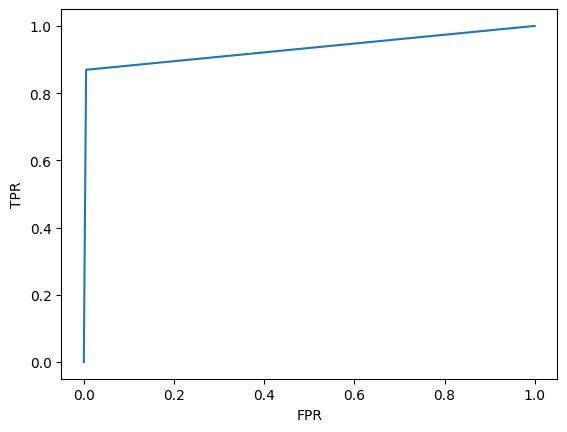

In [24]:
plt.plot(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [25]:
roc_auc

0.932190992973419

**The roc score is 0.932190992973419**

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [26]:
pipeline = Pipeline([
            ('scaling', StandardScaler()), ('pca', PCA(n_components=14)), ('model', LogisticRegression())
            ])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [27]:
params = [
  {
    'max_iter': [1000, 2000, 3000], 
    'tol' : [0.1, 0.01, 0.001],
      'C' : [0.1, 0.001, 1, 10]
  }
 ]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=params, scoring='accuracy')
gs = gs.fit(X_train, y_train)

In [28]:
p = gs.best_params_

In [29]:
p

{'C': 0.1, 'max_iter': 1000, 'tol': 0.1}

In [30]:
pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression(**p))
            ])

_ = pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

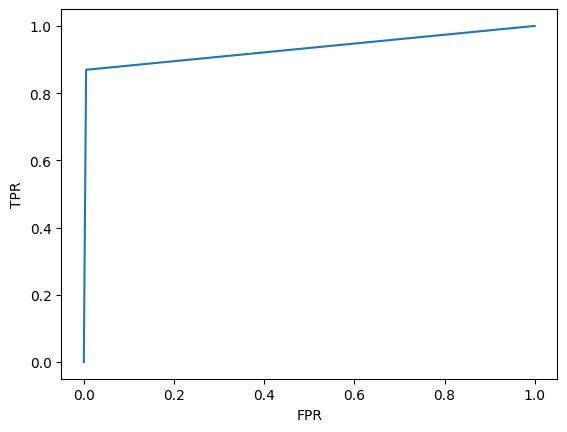

In [32]:
plt.plot(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [33]:
print(f"Accuracy:", accuracy_score(preds, y_test))

print(f"Precision:", precision_score(preds, y_test))

print(f"Recall:", recall_score(preds, y_test))

Accuracy: 0.93125
Precision: 0.8694581280788177
Recall: 0.9943661971830986


**As we can see, our model is performing same with PCA**

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [34]:
pipeline = Pipeline([
            ('kmeans', KMeans()), ('model', LogisticRegression())
            ])

In [35]:
params = [
  {
    'kmeans__n_clusters': [2, 4, 6, 8, 10], 
      'model__C' : [0.1, 0.001, 1, 10]
  }
 ]

gs = GridSearchCV(pipeline, param_grid=params, scoring='accuracy')
gs = gs.fit(X_train, y_train)

In [36]:
p = gs.best_params_

In [37]:
p

{'kmeans__n_clusters': 8, 'model__C': 10}

In [38]:
pipeline = Pipeline([
            ('kmeans', KMeans(n_clusters=8)), ('model', LogisticRegression(C = 10))
            ])

_ = pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)

In [39]:
print(f"Accuracy:", accuracy_score(preds, y_test))

print(f"Precision:", precision_score(preds, y_test))

print(f"Recall:", recall_score(preds, y_test))

Accuracy: 0.9425
Precision: 0.8916256157635468
Recall: 0.9945054945054945


**Model is performing well with respect to all the scoring metics**

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

**As we can see from the results, the recent model is performing better than the model before. So for best result, we can use the model which has kmeans in the preprocessing.**